<a href="https://colab.research.google.com/github/Anetta4/pumpkin_seeds/blob/main/Pumpkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About Dataset:**  
The notebook is about the use of machine learning methods in classification of pumpkin seeds.Genetic Resources and Crop Evolution.Pumpkin seeds are rich in the  right amount of  protein, fat, carbohydrate and mineral contents. The research was carried out on two of the most important and qualitative species of pumpkin seeds:"Urgup_Sivrisi" and "Cercevelik". They are widely grown in the Urgup and Karacaoren regions of Turkey. Considering morphological features of 2500 pumpkin seeds of both varieties, I subjected all data to modeling of known methods of supervised machine learning (classification):


*   Logistic Regression
*   Regularization L2
*   KNN (k-Nearest Neighbor)
*   SVM (Support Vector Machine)
*   Naive Bayes
*   Decision tree
*   Random Forest

**which determined the most effective method of classifying pumpkin seed varieties.**

#Importing data

In [2]:
! git clone https://github.com/Anetta4/pumpkin_seeds.git

fatal: destination path 'pumpkin_seeds' already exists and is not an empty directory.


#Importing dependencies

In [3]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import plotly
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Reading excel

In [5]:
data = pd.read_excel('pumpkin_seeds/Pumpkin_Seeds_Dataset.xlsx')

In [6]:
data.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
943,77915,1122.514,456.2841,218.4462,78732,314.9674,0.8780,0.9896,0.6929,0.7770,2.0888,0.6903,Çerçevelik
705,92547,1214.375,493.4909,239.8281,93424,343.2703,0.8740,0.9906,0.6114,0.7886,2.0577,0.6956,Çerçevelik
202,97902,1233.711,491.1406,254.7969,99020,353.0619,0.8549,0.9887,0.7756,0.8083,1.9276,0.7189,Çerçevelik
1357,71077,1136.241,488.2891,186.0013,71792,300.8289,0.9246,0.9900,0.5132,0.6918,2.6252,0.6161,Ürgüp Sivrisi
1516,86589,1221.667,510.8797,216.3206,87440,332.0370,0.9059,0.9903,0.7396,0.7291,2.3617,0.6499,Ürgüp Sivrisi
2258,93014,1246.667,519.2926,229.1769,93928,344.1353,0.8973,0.9903,0.7539,0.7521,2.2659,0.6627,Ürgüp Sivrisi
993,79638,1100.285,436.6010,233.9445,80282,318.4309,0.8443,0.9920,0.7241,0.8266,1.8663,0.7293,Çerçevelik
214,71614,1036.482,405.5690,226.0209,72260,301.9632,0.8303,0.9911,0.6897,0.8377,1.7944,0.7445,Çerçevelik
237,68256,1033.800,413.0075,212.2104,68919,294.7986,0.8579,0.9904,0.7070,0.8026,1.9462,0.7138,Çerçevelik
21,82196,1141.067,466.2324,225.8543,82991,323.5046,0.8748,0.9904,0.6702,0.7933,2.0643,0.6939,Çerçevelik


In [7]:
data.shape

(2500, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


The column names of the dataset are pretty self-explanatory.

In [9]:
data.describe(include=['object'])

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


In [10]:
data['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

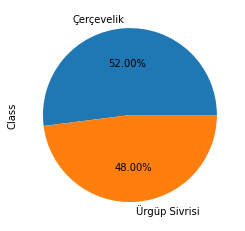

In [12]:
data["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

As we can see there are 2 classes and both of classes have almost equal values.

# Exploratory Data Analysis

In [13]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


#Missing values 


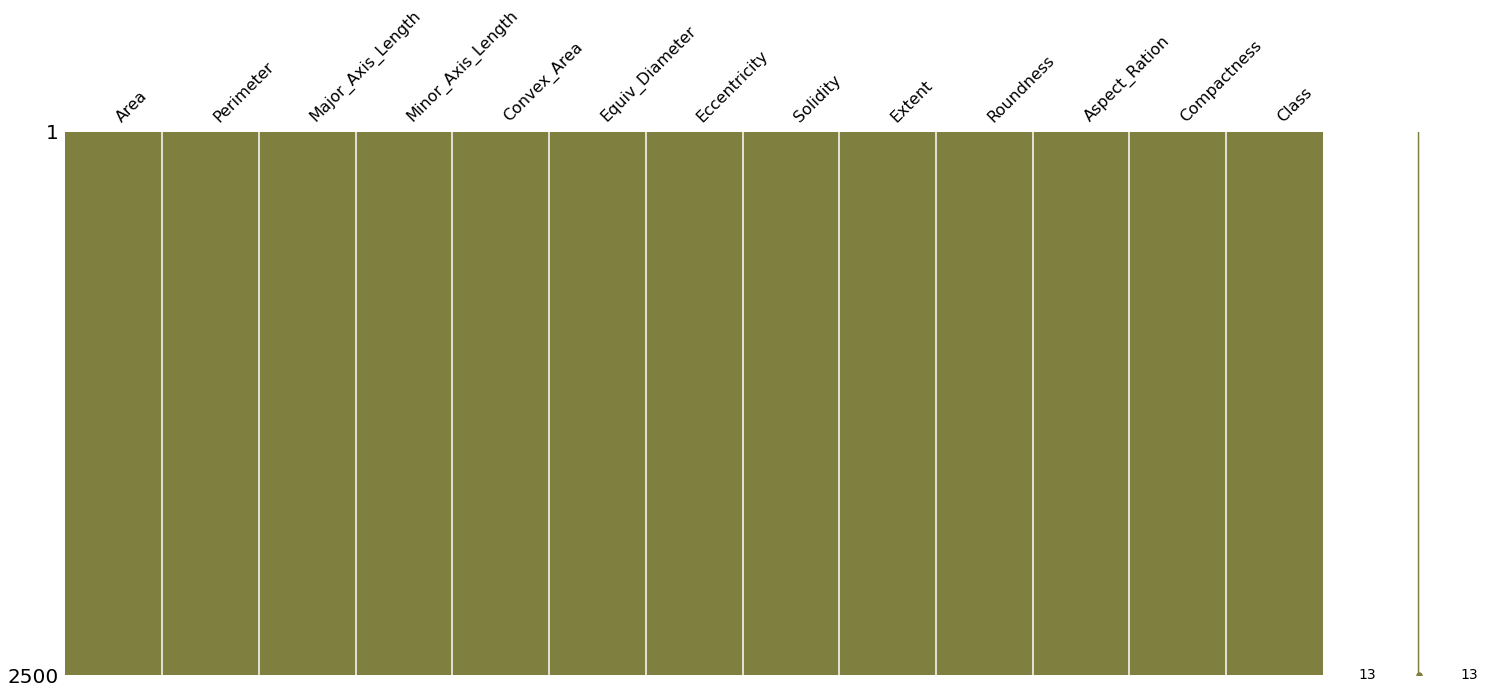

In [14]:
msno.matrix(data, color=(0.5, 0.5, 0.25))

The dataset doesn't have any missing values.

#Data preprocessing for find  outliers in dataset


Are there any outliers in the dataset?

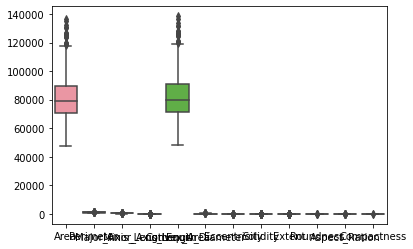

In [15]:
sns.boxplot(data=data)

In order to make the chart above readable I need to scale it, I use StandardScaler

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

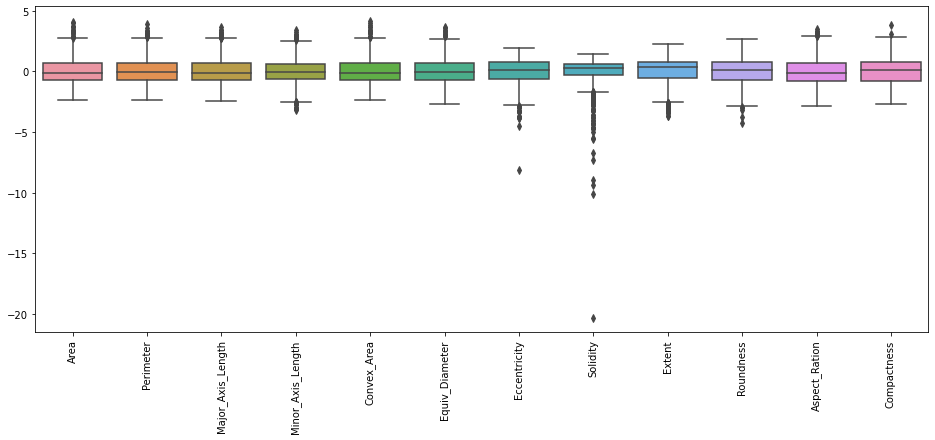

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()       
sc = sc.fit(data.iloc[:,:-1])
data_sc=sc.transform(data.iloc[:,:-1])

plt.figure(figsize = (16,6))
g = sns.boxplot(data=data_sc)
g.set_xticklabels(data.columns)
plt.xticks(rotation=90)

#Remove outliers from dataset

In [17]:
import scipy.stats as stats

In [18]:
np.random.seed(10)

In [19]:

Q1 = data.iloc[:,:-1].quantile(q=.25)
Q3 = data.iloc[:,:-1].quantile(q=.75)
IQR = data.iloc[:,:-1].apply(stats.iqr)

data = data[~((data.iloc[:,:-1] < (Q1-1.5*IQR)) | (data.iloc[:,:-1] > (Q3+1.5*IQR))).any(axis=1)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

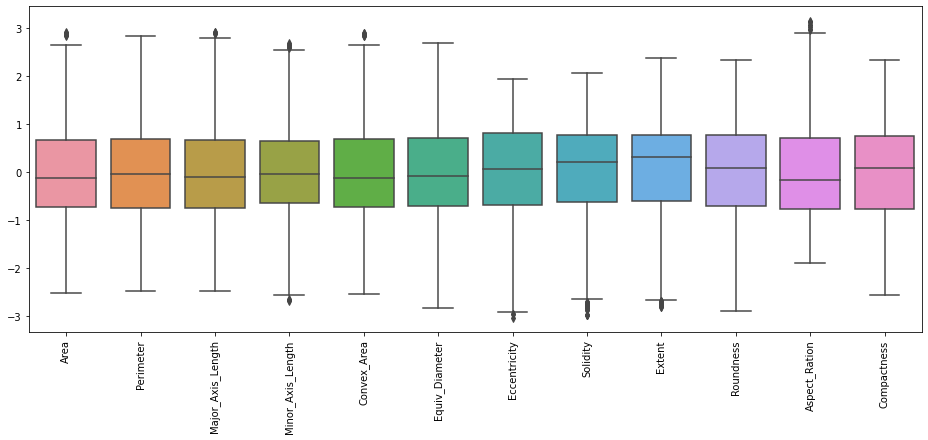

In [20]:
sc = StandardScaler()       
sc = sc.fit(data.iloc[:,:-1])
data_sc=sc.transform(data.iloc[:,:-1])

plt.figure(figsize = (16,6))
g = sns.boxplot(data=data_sc)
g.set_xticklabels(data.columns)
plt.xticks(rotation=90)

**The datasets total is:**

In [21]:
data.shape

(2285, 13)

In [22]:
data["Class"].value_counts()

Çerçevelik       1209
Ürgüp Sivrisi    1076
Name: Class, dtype: int64

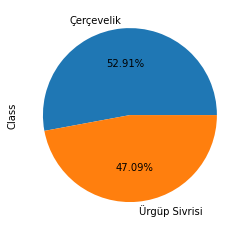

In [23]:
data["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

#Correlation plot for all features

In [24]:
corr_grf=data.iloc[:,:-1].corr()
corr_grf.style.background_gradient(axis=0,vmin=0.03,vmax=0.99)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.933546,0.792655,0.693065,0.999905,0.998852,0.173637,0.149142,0.004194,-0.183784,0.167332,-0.170247
Perimeter,0.933546,1.000000,0.950087,0.405447,0.934181,0.934070,0.484656,0.086364,-0.096342,-0.520174,0.493419,-0.493163
Major_Axis_Length,0.792655,0.950087,1.000000,0.114356,0.792514,0.792134,0.718042,0.120711,-0.157905,-0.721548,0.731211,-0.730792
Minor_Axis_Length,0.693065,0.405447,0.114356,1.000000,0.693334,0.695613,-0.576042,0.084556,0.201491,0.546369,-0.586515,0.587931
Convex_Area,0.999905,0.934181,0.792514,0.693334,1.000000,0.998805,0.173441,0.135697,0.003403,-0.185721,0.167089,-0.170120
Equiv_Diameter,0.998852,0.934070,0.792134,0.695613,0.998805,1.000000,0.172296,0.146945,0.006059,-0.183203,0.165980,-0.168796
Eccentricity,0.173637,0.484656,0.718042,-0.576042,0.173441,0.172296,1.000000,0.033603,-0.284906,-0.940287,0.964951,-0.989100
Solidity,0.149142,0.086364,0.120711,0.084556,0.135697,0.146945,0.033603,1.000000,0.056804,0.120283,0.037335,-0.028548
Extent,0.004194,-0.096342,-0.157905,0.201491,0.003403,0.006059,-0.284906,0.056804,1.000000,0.290077,-0.259225,0.275539
Roundness,-0.183784,-0.520174,-0.721548,0.546369,-0.185721,-0.183203,-0.940287,0.120283,0.290077,1.000000,-0.962283,0.962843


As seen in the correlation plot, we can conclude:
*   Area feature has a very high correlation with Convex_Area and Equiv_Diameter features
*   Convex_Area has very high correlation with Perimeter and Equiv_Diameter features
*   Eccentricity and Aspect_Ration have a high correlation
*   Major_Axis_Length has a high correlation with Perimeter  
*   Roundness and Compactness have a high correlation
 
**I will try to train model after remove outliers**

#Data modification - converting classes into numerical values

'Çerçevelik' = 0 <br>
'Ürgüp Sivrisi' = 1

In [25]:
for i in range(2285):
    if data.iloc[i, -1] == 'Çerçevelik':
       data.iloc[i, -1] = 0
    else:
        data.iloc[i, -1] = 1

In [26]:
data.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
246,83148,1108.881,438.9682,241.5330,83703,325.3726,0.8350,0.9934,0.6906,0.8498,1.8174,0.7412,0
460,72433,1082.509,440.8155,210.3908,73140,303.6850,0.8788,0.9903,0.7269,0.7768,2.0952,0.6889,0
1763,111119,1285.126,505.2116,280.6582,111927,376.1397,0.8315,0.9928,0.6893,0.8455,1.8001,0.7445,1
2268,95146,1192.116,461.1654,263.7214,96444,348.0570,0.8204,0.9865,0.6704,0.8413,1.7487,0.7547,1
2142,81479,1256.515,555.6465,189.8791,82557,322.0905,0.9398,0.9869,0.7438,0.6485,2.9263,0.5797,1
1523,97164,1226.831,490.2503,254.4169,98018,351.7287,0.8548,0.9913,0.7389,0.8112,1.9270,0.7174,1
196,72508,1032.429,404.1488,229.0448,73094,303.8422,0.8239,0.9920,0.6619,0.8548,1.7645,0.7518,0
983,104503,1256.076,484.5323,275.2877,105471,364.7703,0.8229,0.9908,0.7486,0.8324,1.7601,0.7528,0
2260,74545,1164.653,503.7119,191.1775,75354,308.0806,0.9252,0.9893,0.7047,0.6906,2.6348,0.6116,1
2368,85133,1240.763,531.5886,204.8944,86272,329.2335,0.9227,0.9868,0.5787,0.6949,2.5945,0.6193,1


#Seperating into Features and Labels


In [27]:
X = data.drop('Class', axis=1)
y = data['Class']

In [28]:
X.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2494    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2285, dtype: object

In [30]:
y = y.astype('int')

In [31]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,80352.426258,1125.317612,454.609228,225.841833,81164.995186,318.849962,0.860638,0.989942,0.696613,0.795676,2.029513,0.705559
std,12806.047547,103.092571,52.631604,21.784492,12908.161779,25.354878,0.041404,0.002160,0.055906,0.051604,0.292820,0.049513
min,47939.000000,868.485000,324.011300,167.273600,48366.000000,247.058400,0.734800,0.983500,0.538700,0.645700,1.474300,0.578500
25%,70981.000000,1048.514000,415.275700,211.877500,71725.000000,300.625700,0.832100,0.988600,0.663000,0.758600,1.803200,0.667200
50%,78850.000000,1120.129000,448.709400,224.846500,79681.000000,316.851600,0.863100,0.990400,0.714500,0.800200,1.980100,0.709300
75%,89020.000000,1197.405000,490.250300,239.828100,89988.000000,336.665700,0.894500,0.991600,0.740300,0.835700,2.236500,0.743200
max,117831.000000,1417.789000,608.677500,284.543600,118591.000000,387.333300,0.940900,0.994400,0.829600,0.916200,2.952100,0.821300


# Model Selection

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1828, 12)
X_test shape: (457, 12)
y_train shape: (1828,)
y_test shape: (457,)


# MODEL TRAIN

#StandardScaler

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [35]:
sc = StandardScaler()   
df_sc = sc.fit_transform(X_train)

In [36]:
X_train_sc = pd.DataFrame(df_sc, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

In [37]:
X_train_sc

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,1.693225,0.927156,0.268388,2.401301,1.682451,1.642852,-1.316406,0.906325,1.027273,1.245167,-1.162584,1.273437
1,0.958159,1.838524,2.322561,-0.988695,0.952643,0.970149,1.795560,0.533841,1.178821,-2.389118,2.715567,-2.242540
2,0.560393,0.728048,0.818680,-0.046137,0.559525,0.591828,0.763052,0.161357,-1.278416,-0.634100,0.633792,-0.711486
3,0.177058,-0.226923,-0.386403,0.786452,0.164773,0.216670,-0.760440,0.952885,0.556393,1.153921,-0.823588,0.835705
4,-0.474879,-0.211946,0.015157,-0.806007,-0.474286,-0.447936,0.686035,-0.118006,-0.141808,-0.566151,0.530693,-0.612643
...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.797671,-0.171630,0.298900,-1.580144,-0.784437,-0.790839,1.266069,-1.235457,-0.867072,-1.499961,1.447999,-1.419523
1824,-1.480272,-1.645347,-1.558542,-0.649975,-1.484048,-1.550974,-0.926507,0.021676,0.762065,0.967548,-0.931807,0.926479
1825,-0.678467,-0.613748,-0.562787,-0.461720,-0.647224,-0.663060,0.016950,-2.678832,0.269535,0.057035,-0.210116,0.109514
1826,-0.627884,-0.535714,-0.459988,-0.502791,-0.615858,-0.609253,0.134882,-1.095776,-1.056507,-0.038093,-0.095751,-0.007484


In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression

In [39]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)
y_pred_train = model.predict(X_train_sc) 

**Receiver Operating Characteristics (ROC)**

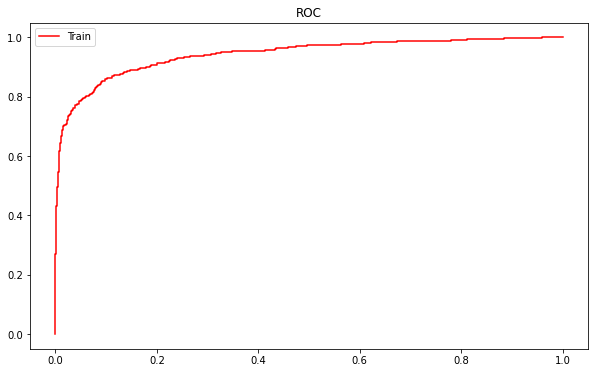

In [40]:
y_pred_train_lr_proba = model.predict_proba(X_train_sc)

from sklearn.metrics import roc_curve

fpr_t, tpr_t, tresholds_t = roc_curve(y_train, y_pred_train_lr_proba[:,1])

plt.figure(figsize = (10, 6))
plt.plot(fpr_t, tpr_t, label = 'Train', c = 'red')
plt.legend()
plt.title('ROC')
plt.show()

In [41]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[881,  86],
       [132, 729]])

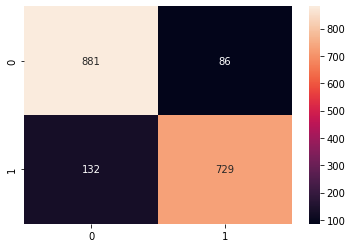

In [42]:
cm_train = confusion_matrix(y_train, y_pred_train)  
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

**Logistic Regression - results**

In [43]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       967
           1       0.89      0.85      0.87       861

    accuracy                           0.88      1828
   macro avg       0.88      0.88      0.88      1828
weighted avg       0.88      0.88      0.88      1828



In [44]:
accuracy_score(y_train,y_pred_train)

0.8807439824945296

# Logistic Regression with L2 regularization

In [45]:
rlr = LogisticRegression(solver = 'liblinear', penalty ='l2', C=0.5)
rlr.fit(X_train_sc, y_train)  
y_pred_train_rlr = rlr.predict(X_train_sc)

In [46]:
confusion_matrix(y_train, y_pred_train_rlr)

array([[879,  88],
       [132, 729]])

**Logistic Regression with L2 regularization - results**

In [47]:
print(classification_report(y_train,y_pred_train_rlr))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       967
           1       0.89      0.85      0.87       861

    accuracy                           0.88      1828
   macro avg       0.88      0.88      0.88      1828
weighted avg       0.88      0.88      0.88      1828



In [48]:
accuracy_score(y_train,y_pred_train_rlr)

0.8796498905908097

# Grid Search for Logistic Regression with L2 regularyzation

In [49]:
from sklearn.model_selection import GridSearchCV 
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(rlr, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 100}
Best CV accuracy 0.8845662100456622


# KNeighborsClassifier (KNN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100, metric='manhattan')
knn.fit(X_train_sc, y_train)
y_pred_train_knn = knn.predict(X_train_sc)

**KNeighborsClassifier (KNN) - results**

In [51]:
print(classification_report(y_train,y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       967
           1       0.91      0.82      0.86       861

    accuracy                           0.88      1828
   macro avg       0.88      0.88      0.88      1828
weighted avg       0.88      0.88      0.88      1828



In [52]:
accuracy_score(y_train,y_pred_train_knn)

0.8791028446389497

In [53]:
confusion_matrix(y_train, y_pred_train_knn)

array([[900,  67],
       [154, 707]])

# Support Vector Machines (SVM)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC(C = 0.1, kernel="linear")
svm.fit(X_train_sc,y_train)
y_pred_train_svm = svm.predict(X_train_sc)

**SVM - results**

In [55]:
print(classification_report(y_train,y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       967
           1       0.89      0.83      0.86       861

    accuracy                           0.87      1828
   macro avg       0.88      0.87      0.87      1828
weighted avg       0.87      0.87      0.87      1828



In [56]:
accuracy_score(y_train,y_pred_train_svm)

0.8730853391684902

In [57]:
confusion_matrix(y_train, y_pred_train_svm)

array([[883,  84],
       [148, 713]])

# Grid Search for SVM results

In [58]:
svm = SVC(kernel="linear")
svm.fit(X_train_sc,y_train)

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 100}
Best CV accuracy 0.8851156523691893


# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_sc,y_train)
y_pred_train_nb=nb.predict(X_train_sc)

**Naive Bayes - results**

In [60]:
print(classification_report(y_train,y_pred_train_nb))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       967
           1       0.88      0.85      0.86       861

    accuracy                           0.87      1828
   macro avg       0.87      0.87      0.87      1828
weighted avg       0.87      0.87      0.87      1828



In [61]:
accuracy_score(y_train,y_pred_train_nb)

0.8714442013129103

In [62]:
confusion_matrix(y_train, y_pred_train_nb)

array([[863, 104],
       [131, 730]])

#DecisionTreeClassifier

# Bagging Classifier - results

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bg=BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg.fit(X_train_sc,y_train)
y_pred_train_bg=bg.predict(X_train_sc)
print(classification_report(y_train,y_pred_train_bg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       1.00      0.98      0.99       861

    accuracy                           0.99      1828
   macro avg       0.99      0.99      0.99      1828
weighted avg       0.99      0.99      0.99      1828



In [64]:
accuracy_score(y_train,y_pred_train_bg)

0.9890590809628009

In [65]:
confusion_matrix(y_train, y_pred_train_bg)

array([[965,   2],
       [ 18, 843]])

#Random Forest Classifier - results

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train_sc, y_train)
y_pred_train_rf=rf.predict(X_train_sc)
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       967
           1       0.92      0.86      0.89       861

    accuracy                           0.90      1828
   macro avg       0.90      0.90      0.90      1828
weighted avg       0.90      0.90      0.90      1828



In [67]:
accuracy_score(y_train,y_pred_train_rf)

0.8982494529540481

In [68]:
confusion_matrix(y_train, y_pred_train_rf)

array([[901,  66],
       [120, 741]])

# MODEL TEST

In [69]:
X_test.shape

(457, 12)

In [70]:
y_test.shape

(457,)

In [71]:
df_sc_test = sc.transform(X_test)
X_test_sc = pd.DataFrame(df_sc_test, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

# Logistic Regression - results

In [72]:
y_pred_lr = model.predict(X_test_sc)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       242
           1       0.90      0.86      0.88       215

    accuracy                           0.89       457
   macro avg       0.89      0.88      0.89       457
weighted avg       0.89      0.89      0.89       457



In [73]:
accuracy_score(y_test,y_pred_lr)

0.8862144420131292

In [74]:
confusion_matrix(y_test, y_pred_lr)

array([[221,  21],
       [ 31, 184]])

**Receiver Operating Characteristics (ROC)**

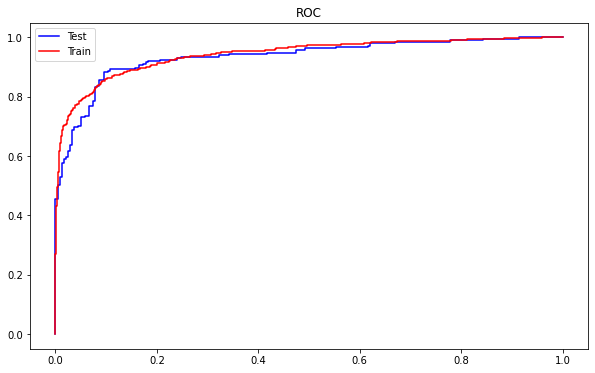

In [75]:
y_pred_train_lr_proba = model.predict_proba(X_train_sc)
y_pred_lr_proba = model.predict_proba(X_test_sc)

from sklearn.metrics import roc_curve

fpr_t, tpr_t, tresholds_t = roc_curve(y_train, y_pred_train_lr_proba[:,1])
fpr, tpr, tresholds = roc_curve(y_test, y_pred_lr_proba[:,1])


plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, label ='Test', c = 'blue')
plt.plot(fpr_t, tpr_t, label = 'Train', c = 'red')
plt.legend()
plt.title('ROC')
plt.show()

# Logistic Regression with L2 regularization - results

In [76]:
y_pred_rlr = rlr.predict(X_test_sc)
print(classification_report(y_test,y_pred_rlr))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       242
           1       0.89      0.86      0.87       215

    accuracy                           0.88       457
   macro avg       0.88      0.88      0.88       457
weighted avg       0.88      0.88      0.88       457



In [77]:
accuracy_score(y_test,y_pred_rlr)

0.8840262582056893

In [78]:
confusion_matrix(y_test, y_pred_rlr)

array([[219,  23],
       [ 30, 185]])

# KNeighborsClassifier (KNN) - results

In [79]:
y_pred_knn = knn.predict(X_test_sc)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       242
           1       0.89      0.81      0.85       215

    accuracy                           0.86       457
   macro avg       0.87      0.86      0.86       457
weighted avg       0.86      0.86      0.86       457



In [80]:
accuracy_score(y_test,y_pred_knn)

0.862144420131291

In [81]:
confusion_matrix(y_test, y_pred_knn)

array([[220,  22],
       [ 41, 174]])

# SVM - results

In [82]:
y_pred_svm = svm.predict(X_test_sc)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       242
           1       0.91      0.84      0.87       215

    accuracy                           0.88       457
   macro avg       0.89      0.88      0.88       457
weighted avg       0.89      0.88      0.88       457



In [83]:
accuracy_score(y_test,y_pred_svm)

0.8840262582056893

In [84]:
confusion_matrix(y_test, y_pred_svm)

array([[223,  19],
       [ 34, 181]])

# Naive Bayes - results



In [85]:
y_pred_nb=nb.predict(X_test_sc)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       242
           1       0.84      0.82      0.83       215

    accuracy                           0.84       457
   macro avg       0.84      0.84      0.84       457
weighted avg       0.84      0.84      0.84       457



In [86]:
accuracy_score(y_test,y_pred_nb)

0.8446389496717724

In [87]:
confusion_matrix(y_test, y_pred_nb)

array([[209,  33],
       [ 38, 177]])

#DecisionTreeClassifier - results

In [88]:
y_pred_bg = bg.predict(X_test_sc)
print(classification_report(y_test,y_pred_bg))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       242
           1       0.89      0.82      0.85       215

    accuracy                           0.87       457
   macro avg       0.87      0.86      0.87       457
weighted avg       0.87      0.87      0.87       457



In [89]:
accuracy_score(y_test,y_pred_bg)

0.8665207877461707

In [90]:
confusion_matrix(y_test, y_pred_bg)

array([[220,  22],
       [ 39, 176]])

#Random Forest Classifier - results

In [91]:
y_pred_rf=rf.predict(X_test_sc)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       242
           1       0.90      0.83      0.86       215

    accuracy                           0.88       457
   macro avg       0.88      0.87      0.88       457
weighted avg       0.88      0.88      0.88       457



In [92]:
accuracy_score(y_test,y_pred_rf)

0.8774617067833698

In [93]:
confusion_matrix(y_test, y_pred_rf)

array([[222,  20],
       [ 36, 179]])

#Collected training and testing results  of the model 

In [94]:
print("Accurasy_score on the: \n\n"
     f"Training Model - Logistic Regression: {accuracy_score(y_train,y_pred_train):.2f}\n"
     f"Testing Model  - Logistic Regression: {accuracy_score(y_test,y_pred_lr):.2f}\n\n"
     f"Training Model - Logistic Regression with l2: {accuracy_score(y_train,y_pred_train_rlr):.2f}\n"
     f"Testing Model  - Logistic Regression with l2: {accuracy_score(y_test,y_pred_rlr):.2f}\n\n"
     f"Training Model - KNN: {accuracy_score(y_train,y_pred_train_knn):.2f}\n"
     f"Testing Model  - KNN: {accuracy_score(y_test,y_pred_knn):.2f}\n\n"
     f"Training Model - SVM: {accuracy_score(y_train,y_pred_train_svm):.2f}\n"
     f"Testing Model  - SVM: {accuracy_score(y_test,y_pred_svm):.2f}\n\n" 
     f"Training Model - Naive Bayes: {accuracy_score(y_train,y_pred_train_nb):.2f}\n"
     f"Testing Model  - Naive Bayes: {accuracy_score(y_test,y_pred_nb):.2f}\n\n"
     f"Training Model - Bagging Classifier: {accuracy_score(y_train,y_pred_train_bg):.2f} \n"
     f"Testing Model  - Bagging Classifier: {accuracy_score(y_test,y_pred_bg):.2f}\n\n"
     f"Training Model - RandomForestClassifier: {accuracy_score(y_train,y_pred_train_rf):.2f}\n"
     f"Testing Model  - RandomForestClassifier: {accuracy_score(y_test,y_pred_rf):.2f}")

Accurasy_score on the: 

Training Model - Logistic Regression: 0.88
Testing Model  - Logistic Regression: 0.89

Training Model - Logistic Regression with l2: 0.88
Testing Model  - Logistic Regression with l2: 0.88

Training Model - KNN: 0.88
Testing Model  - KNN: 0.86

Training Model - SVM: 0.87
Testing Model  - SVM: 0.88

Training Model - Naive Bayes: 0.87
Testing Model  - Naive Bayes: 0.84

Training Model - Bagging Classifier: 0.99 
Testing Model  - Bagging Classifier: 0.87

Training Model - RandomForestClassifier: 0.90
Testing Model  - RandomForestClassifier: 0.88


#Conclusion



*   SVM is the best above model.
*   I also achieved good accuracies with Logistic Regression, 
    KNN and Random Forest Algorithms.

